In [1]:
# Install citipy
! pip install citipy

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [3]:
## Generate Cities List
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

617

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# Print statement to start run the API Calls
print(f"Beginning Data Retrieval")
print(f"------------------------------")

# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "Imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

# Set up lists to hold response info
city_data=[]
cloudiness=[]
country=[]
date=[]
humidity=[]
lat=[]
lng=[]
max_temp=[]
wind_speed=[]

# Set initial count number for the API call loop
count = 0
index_count = 1

# Loop through the list of cities and perform a request for data on each
for city in cities:
    try:
        response = requests.get(query_url + city).json()
        cloudiness.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        humidity.append(response['main']['humidity'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        wind_speed.append(response['wind']['speed'])
    
# Add if condition for the count
        if count > 49:
            count = 0
            index_count += 1
            city_data.append(city)
        else:
            count += 1
            city_data.append(city)
            
# Print statement for processing records
        print(f"Processing Record {count} of Set {index_count}: {city}")
    
# Add Exception Handling message for City not found
    except:
        print(f"City not found. Skipping...")
        
# Print statement for ending the process
print("------------------------------")
print("Data Retrieval Complete")
print("------------------------------")
    

Beginning Data Retrieval
------------------------------
Processing Record 1 of Set 1: jamestown
City not found. Skipping...
Processing Record 2 of Set 1: puerto ayora
Processing Record 3 of Set 1: bluff
Processing Record 4 of Set 1: bredasdorp
Processing Record 5 of Set 1: ancud
Processing Record 6 of Set 1: omsukchan
Processing Record 7 of Set 1: bethel
Processing Record 8 of Set 1: punta arenas
Processing Record 9 of Set 1: kota kinabalu
Processing Record 10 of Set 1: pacific grove
City not found. Skipping...
Processing Record 11 of Set 1: san patricio
Processing Record 12 of Set 1: zimovniki
Processing Record 13 of Set 1: busselton
Processing Record 14 of Set 1: cidreira
Processing Record 15 of Set 1: qaanaaq
Processing Record 16 of Set 1: lebu
Processing Record 17 of Set 1: souillac
Processing Record 18 of Set 1: puerto colombia
City not found. Skipping...
Processing Record 19 of Set 1: saint-pierre
Processing Record 20 of Set 1: riohacha
Processing Record 21 of Set 1: rikitea
Proc

Processing Record 36 of Set 4: walvis bay
Processing Record 37 of Set 4: avera
Processing Record 38 of Set 4: bilma
Processing Record 39 of Set 4: sunndalsora
Processing Record 40 of Set 4: pimenta bueno
Processing Record 41 of Set 4: daru
Processing Record 42 of Set 4: manta
Processing Record 43 of Set 4: tadine
Processing Record 44 of Set 4: poum
Processing Record 45 of Set 4: dunedin
Processing Record 46 of Set 4: geraldton
Processing Record 47 of Set 4: hay river
Processing Record 48 of Set 4: jablah
Processing Record 49 of Set 4: clyde river
Processing Record 50 of Set 4: yar-sale
Processing Record 0 of Set 5: homer
Processing Record 1 of Set 5: grand gaube
Processing Record 2 of Set 5: linares
Processing Record 3 of Set 5: vanavara
Processing Record 4 of Set 5: miquelon
Processing Record 5 of Set 5: pevek
Processing Record 6 of Set 5: ulladulla
Processing Record 7 of Set 5: codrington
Processing Record 8 of Set 5: lufilufi
Processing Record 9 of Set 5: kalabo
Processing Record 10

Processing Record 29 of Set 8: camana
Processing Record 30 of Set 8: kupang
Processing Record 31 of Set 8: cleveland
Processing Record 32 of Set 8: lieksa
Processing Record 33 of Set 8: treinta y tres
Processing Record 34 of Set 8: hofn
City not found. Skipping...
Processing Record 35 of Set 8: santa cruz
Processing Record 36 of Set 8: esmeraldas
Processing Record 37 of Set 8: magadan
Processing Record 38 of Set 8: komsomolskiy
Processing Record 39 of Set 8: colac
Processing Record 40 of Set 8: constitucion
Processing Record 41 of Set 8: gushikawa
Processing Record 42 of Set 8: zhaotong
Processing Record 43 of Set 8: kinablangan
Processing Record 44 of Set 8: bandarbeyla
Processing Record 45 of Set 8: new glasgow
Processing Record 46 of Set 8: schiffweiler
City not found. Skipping...
Processing Record 47 of Set 8: hirara
Processing Record 48 of Set 8: ixtapa
Processing Record 49 of Set 8: vilyuysk
Processing Record 50 of Set 8: impfondo
Processing Record 0 of Set 9: lata
Processing Rec

In [5]:
# Create a DataFrame to hold retrieved variables

weatherpy_df = pd.DataFrame ({
    "City": city_data,
    "Cloudiness": cloudiness,
    "Country": country,
    "Date": date,
    "Humidity": humidity,
    "Lat": lat,
    "Lng": lng,
    "Max Temp": max_temp,
    "Wind Speed": wind_speed
})

# Export the city data into a .csv file
weatherpy_df.to_csv("../output_data/weatherpy_data.csv")

# Display the DataFrame
weatherpy_df.describe()

,Cloudiness,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
count,566.000000,5.660000e+02,566.000000,566.000000,566.000000,566.000000,566.000000
mean,50.681979,1.602990e+09,72.519435,22.271484,19.682014,59.303781,7.887862
std,39.142507,6.642325e+01,20.794966,33.102840,88.068808,19.172901,5.609023
min,0.000000,1.602989e+09,12.000000,-54.800000,-179.170000,6.640000,0.400000
25%,5.000000,1.602990e+09,61.000000,-2.707500,-58.717500,44.600000,3.537500
50%,49.500000,1.602990e+09,78.000000,28.000000,25.000000,62.010000,6.860000
75%,90.000000,1.602990e+09,88.000000,49.702500,93.312500,75.915000,10.290000
max,100.000000,1.602990e+09,100.000000,78.220000,177.480000,96.800000,42.500000


In [6]:
# Count of retrieved city data
weatherpy_df.count()

City          566
Cloudiness    566
Country       566
Date          566
Humidity      566
Lat           566
Lng           566
Max Temp      566
Wind Speed    566
dtype: int64

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

In [7]:
weatherpy_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,jamestown,1,US,1602989705,48,42.10,-79.24,45.00,6.93
1,puerto ayora,91,EC,1602989713,86,-0.74,-90.35,71.01,4.00
2,bluff,56,NZ,1602989713,66,-46.60,168.33,53.01,7.00
3,bredasdorp,100,ZA,1602989713,93,-34.53,20.04,53.60,5.82
4,ancud,90,CL,1602989713,93,-41.87,-73.82,48.99,12.75


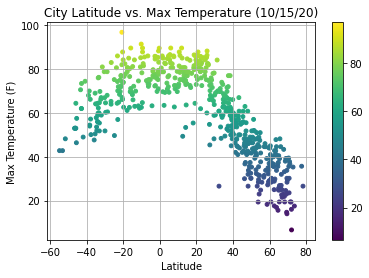

In [8]:
## Latitude vs. Temperature Plot
# set up x_values & y_values
x_values = weatherpy_df['Lat']
y_values = weatherpy_df['Max Temp']

# set up formatting for scatter plot
plt.scatter(x_values, y_values, s=15, c=y_values, cmap = "viridis", marker = "o")
plt.colorbar()
plt.grid(b=True)

# set up scatter title, xlabel, and ylabel
plt.title("City Latitude vs. Max Temperature (10/15/20)")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')

# save fig & show final result
plt.savefig("../Images/fig1.png")
plt.show()

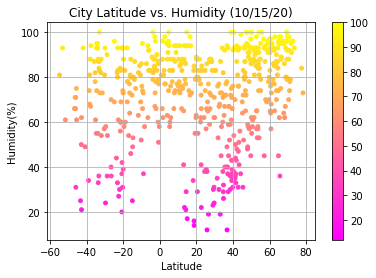

In [9]:
## Latitude vs. Humidity Plot

# set up x_values & y_values
x_values = weatherpy_df['Lat']
y_values = weatherpy_df['Humidity']

# set up formatting for scatter plot
plt.scatter(x_values, y_values, s=15, c=y_values, cmap = "spring", marker = "o")
plt.colorbar()
plt.grid(b=True)

# set up scatter title, xlabel, and ylabel
plt.title("City Latitude vs. Humidity (10/15/20)")
plt.xlabel('Latitude')
plt.ylabel('Humidity(%)')

# save fig & show final result
plt.savefig('../Images/fig2.png')
plt.show()

## Latitude vs. Cloudiness Plot

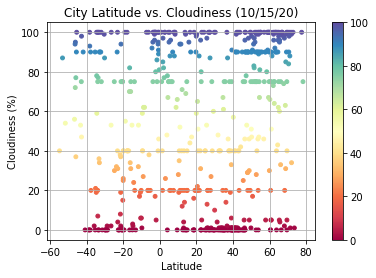

In [10]:
## Latitude vs. Humidity Plot

# set up x_values & y_values
x_values = weatherpy_df['Lat']
y_values = weatherpy_df['Cloudiness']

# set up formatting for scatter plot
plt.scatter(x_values, y_values, s=15, c=y_values, cmap = "Spectral", marker = "o")
plt.colorbar()
plt.grid(b=True)

# set up scatter title, xlabel, and ylabel
plt.title("City Latitude vs. Cloudiness (10/15/20)")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

# save fig & show final result
plt.savefig('../Images/fig3.png')
plt.show()

## Latitude vs. Wind Speed Plot

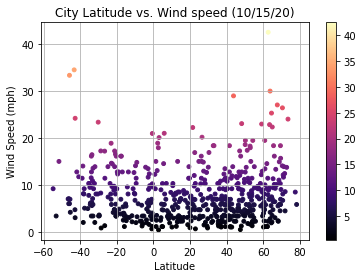

In [11]:
# Latitude vs. Wind Speed Plot

# set up x_values & y_values
x_values = weatherpy_df['Lat']
y_values = weatherpy_df['Wind Speed']

# set up formatting for scatter plot
plt.scatter(x_values, y_values, s=15, c=y_values, cmap = "magma", marker = "o")
plt.colorbar()
plt.grid(b=True)

# set up scatter title, xlabel, and ylabel
plt.title("City Latitude vs. Wind speed (10/15/20)")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')

# save fig & show final result
plt.savefig('../Images/fig4.png')
plt.show()

## Linear Regression

In [12]:
# Create a dataframe for Northern Hemisphere
northern_hemisphere = weatherpy_df.loc[weatherpy_df["Lat"] > 0]
northern_hemisphere

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,jamestown,1,US,1602989705,48,42.10,-79.24,45.00,6.93
5,omsukchan,64,RU,1602989713,77,62.53,155.80,28.85,7.90
6,bethel,1,US,1602989714,93,41.37,-73.41,42.01,3.36
8,kota kinabalu,20,MY,1602989714,62,5.97,116.07,89.60,5.82
9,pacific grove,0,US,1602989640,78,36.62,-121.92,66.99,1.19
...,...,...,...,...,...,...,...,...,...
560,keti bandar,100,PK,1602989782,62,24.14,67.45,85.23,8.93
561,ozark,87,US,1602989782,40,37.02,-93.21,62.01,1.01
562,mrakovo,75,RU,1602989782,93,52.72,56.62,32.34,1.63
564,margate,83,GB,1602989782,92,51.38,1.39,52.00,4.00


In [13]:
# Create a dataframe for Southern Hemisphere
southern_hemisphere = weatherpy_df.loc[weatherpy_df["Lat"] < 0]
southern_hemisphere

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
1,puerto ayora,91,EC,1602989713,86,-0.74,-90.35,71.01,4.00
2,bluff,56,NZ,1602989713,66,-46.60,168.33,53.01,7.00
3,bredasdorp,100,ZA,1602989713,93,-34.53,20.04,53.60,5.82
4,ancud,90,CL,1602989713,93,-41.87,-73.82,48.99,12.75
7,punta arenas,87,CL,1602989524,93,-53.15,-70.92,42.80,3.36
...,...,...,...,...,...,...,...,...,...
548,gamba,100,GA,1602989780,88,-2.65,10.00,76.35,5.44
549,musoma,75,TZ,1602989649,83,-1.50,33.80,69.80,6.15
553,prieska,0,ZA,1602989781,24,-29.66,22.75,64.60,3.58
557,el alto,92,PE,1602989781,89,-4.27,-81.21,63.25,13.76


In [14]:
## Calculate Liner Regression & equation of regression
# Define funcation for Liner Regression calcualtion
def liner_regression(x_values, y_values, eq_pos):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    print(f"The r-value is: {rvalue}")

    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    plt.annotate(line_eq,eq_pos,fontsize=15,color="#FF00FF")
    plt.scatter(x_values, y_values, s=15, c=y_values, cmap = "viridis", marker = "o")
    plt.grid(b=True)
    plt.plot(x_values, regress_values, "#FF0000")

The r-value is: -0.8848971509607091


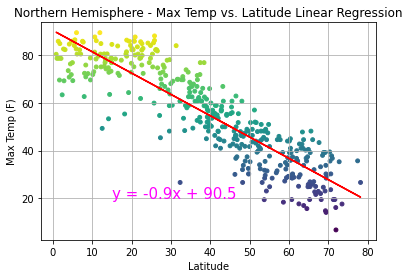

In [17]:
##  Northern Hemisphere - Max Temp vs. Latitude Linear Regression
# define x_value, y_value
x_values = northern_hemisphere["Lat"]
y_values = northern_hemisphere["Max Temp"]
eq_pos = (15,20)

# Calculate liner regression between Latitude & Max Temp
liner_regression(x_values, y_values, eq_pos)

# set up title, xlabel, ylabel for scatter plot
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")

# save scatter plot fig & show final result
plt.savefig("../Images/fig5.png")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.6788571137755541


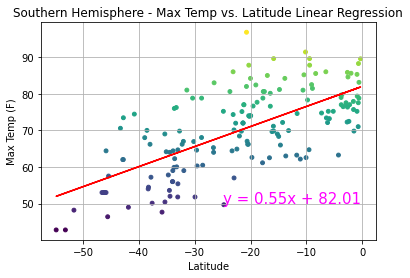

In [22]:
## Southern Hemisphere - Max Temp vs. Latitude Linear Regression
# define x_value, y_value
x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Max Temp"]
eq_pos = (-25,50)

# Calculate liner regression between Latitude & Max Temp
liner_regression(x_values, y_values, eq_pos)

# set up title, xlabel, ylabel for scatter plot
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")

# save scatter plot fig & show final result
plt.savefig("../Images/fig6.png")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.18828249798779226


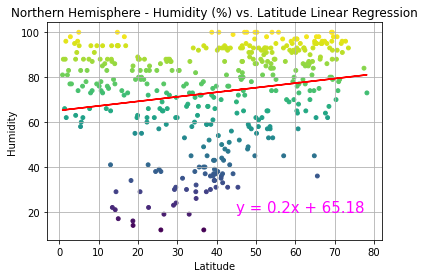

In [23]:
## Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression
# define x_value, y_value
x_values = northern_hemisphere["Lat"]
y_values = northern_hemisphere["Humidity"]
eq_pos = (45,20)

# Calculate liner regression between Latitude & Max Temp
liner_regression(x_values, y_values, eq_pos)

# set up title, xlabel, ylabel for scatter plot
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Humidity")

# save scatter plot fig & show final result
plt.savefig("../Images/fig7.png")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.186831626901598


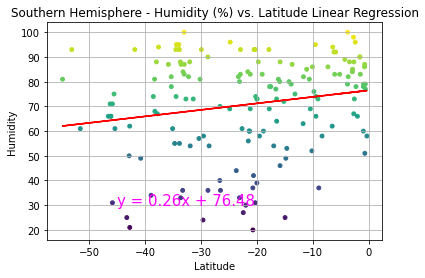

In [24]:
## Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression
# define x_value, y_value
x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Humidity"]
eq_pos = (-45,30)

# Calculate liner regression between Latitude & Max Temp
liner_regression(x_values, y_values, eq_pos)

# set up title, xlabel, ylabel for scatter plot
plt.title("Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Humidity")

# save scatter plot fig & show final result
plt.savefig("../Images/fig8.png")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.2031714690211699


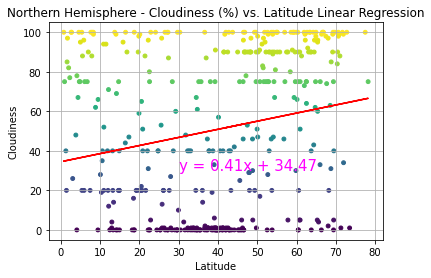

In [25]:
## Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression
# define x_value, y_value
x_values = northern_hemisphere["Lat"]
y_values = northern_hemisphere["Cloudiness"]
eq_pos = (30,30)

# Calculate liner regression between Latitude & Max Temp
liner_regression(x_values, y_values, eq_pos)

# set up title, xlabel, ylabel for scatter plot
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

# save scatter plot fig & show final result
plt.savefig("../Images/fig9.png")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.06037456073345573


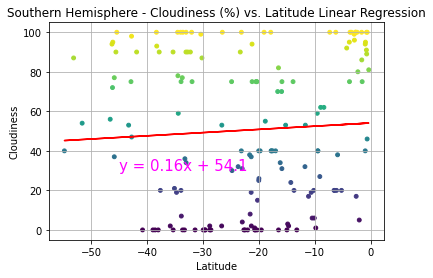

In [33]:
## Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression
# define x_value, y_value
x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Cloudiness"]
eq_pos = (-45,30)

# Calculate liner regression between Latitude & Max Temp
liner_regression(x_values, y_values, eq_pos)

# set up title, xlabel, ylabel for scatter plot
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

# save scatter plot fig & show final result
plt.savefig("../Images/fig10.png")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.1835451640037999


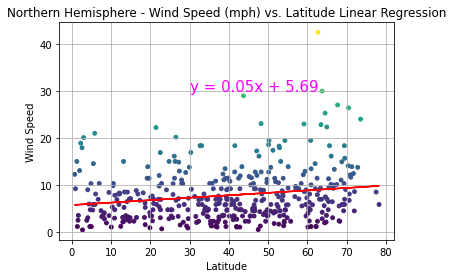

In [28]:
## Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression
# define x_value, y_value
x_values = northern_hemisphere["Lat"]
y_values = northern_hemisphere["Wind Speed"]
eq_pos = (30,30)

# Calculate liner regression between Latitude & Max Temp
liner_regression(x_values, y_values, eq_pos)

# set up title, xlabel, ylabel for scatter plot
plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

# save scatter plot fig & show final result
plt.savefig("../Images/fig11.png")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.24348115515666605


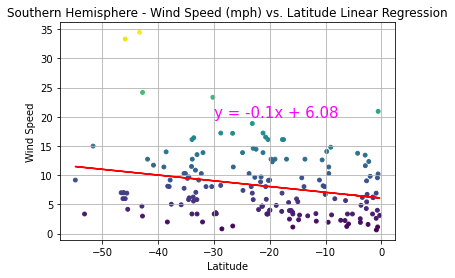

In [31]:
## Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression
# define x_value, y_value
x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Wind Speed"]
eq_pos = (-30,20)

# Calculate liner regression between Latitude & Max Temp
liner_regression(x_values, y_values, eq_pos)

# set up title, xlabel, ylabel for scatter plot
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

# save scatter plot fig & show final result
plt.savefig("../Images/fig12.png")
plt.show()